<a href="https://colab.research.google.com/github/Sriyoshija/task3/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------------------------------------------------
REGRESSION RESULTS
--------------------------------------------------
Intercept: 4706527.39

Evaluation Metrics:
MAE: 970043.40
MSE: 1754318687330.67
RMSE: 1324506.96
R²: 0.65

Top Predictive Features:
                Feature    Coefficient
2             bathrooms  521879.027748
0                  area  519552.416340
8       airconditioning  365157.393851
3               stories  349251.438906
10             prefarea  266656.351993
12  furnish_unfurnished -192015.917982
9               parking  192005.953667
6              basement  187067.803214
7       hotwaterheating  149862.702991
4              mainroad  128498.628215


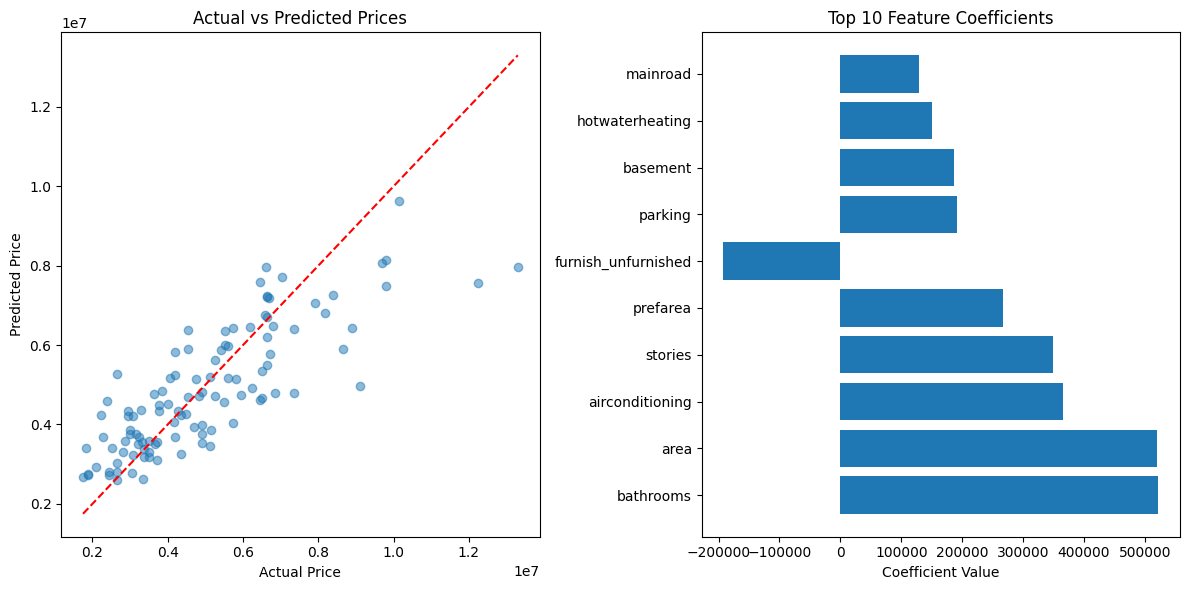

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/Housing.csv')

#Preprocessing
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

#One-hot encode furnishingstatus
df = pd.get_dummies(df, columns=['furnishingstatus'], prefix='furnish', drop_first=True)

target = 'price'
X = df.drop(columns=[target])#multiple linear regression
y = df[target]

#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

#Evaluate model
y_pred = model.predict(X_test_scaled)
metrics = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'R²': r2_score(y_test, y_pred)
}

#Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

#Visualization
plt.figure(figsize=(12, 6))

#Actual vs Predicted plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.subplot(1, 2, 2)
plt.barh(feature_importance['Feature'][:10], feature_importance['Coefficient'][:10])
plt.title('Top 10 Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.savefig('housing_regression_results.png')

print("-"*50)
print("REGRESSION RESULTS")
print("-"*50)
print(f"Intercept: {model.intercept_:.2f}")
print("\nEvaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

print("\nTop Predictive Features:")
print(feature_importance.head(10))